<a href="https://colab.research.google.com/github/gustavopcunam/tarea-/blob/main/Copia_de_02_Ejemplo_Datos_Inmuebles24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Develop LASSO Regression Models in Python

September 13, 2024

Objetivo:

* Lasso Regression es una extensión de la regresión lineal que agrega una penalización de regularización a la función de pérdida durante el entrenamiento.

* Cómo evaluar un modelo de regresión de Lasso y utilizar un modelo final para hacer predicciones de nuevos datos.

* Cómo configurar el modelo Lasso Regression para un nuevo conjunto de datos.

## Setup
#### Load Python libaries, etc.

In [ ]:
#




# pandas (manejo de datos)
!pip install pandas

# scikit-learn (modelos predictivos, escalado, validación)
!pip install scikit-learn

# numpy (operaciones numéricas)
!pip install numpy

# matplotlib (visualización básica)
!pip install matplotlib

# statsmodels (modelos estadísticos tipo R)
!pip install statsmodels

# scipy (estadística y pruebas de hipótesis)
!pip install scipy

# plotly (gráficos interactivos)
!pip install plotly


# Dependencies
import pandas as pd
pd.set_option('display.max_columns', 500)  # Show up to 500 columns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from scipy import stats
import plotly.express as px

#
import warnings
warnings.filterwarnings('ignore')

## Lasso Regression

El objetivo es econtrar los valores de $\hat{\boldsymbol{\beta}}^{Lasso}$ que resulta de:
$$\hat{\boldsymbol{\beta}}^{Lasso} = \min_{\boldsymbol{\beta}} \left[ \sum_{i = 1}^n (y_i - \mathbf{X}_i \boldsymbol{\beta})^2 + \lambda \sum_{k = 2}^K |\beta_k| \right]$$

Donde $\lambda \geq 0$ y suponemos que $\beta_1$ es el término constante de la regresión. El término constante se estima considerando que este toma el valor de la media de $Y$ dado por: $\overline{Y} = \frac{\sum_{i = 1}^{n} y_i}{n}$.

## Lectura de Data

Los datos utilizados corresponden a precios de venta de inmuebles en la CDMX recolectados de la web de Inmuebles 24 en mayo de 2020.

In [ ]:
# Data

!pip install openpyxl

Price1 = pd.read_excel('10_percent_Florida.xlsx')
print("Restaurado:", Price1.shape)

Price1.tail()



Restaurado: (2806, 805)


,listingDataSource,zpid,city,state,homeStatus,isListingClaimedByCurrentSignedInUser,isCurrentSignedInAgentResponsible,bedrooms,bathrooms,price,yearBuilt,streetAddress,zipcode,isCurrentSignedInUserVerifiedOwner,regionString,propertyUpdatePageLink,moveHomeMapLocationLink,propertyEventLogLink,editPropertyHistorylink,isRentalListingOffMarket,hdpUrl,nearbyCities,nearbyNeighborhoods,country,nearbyZipcodes,abbreviatedAddress,building,isUndisclosedAddress,boroughId,providerListingID,boroughSearchUrl,communityUrl,isPremierBuilder,isZillowOwned,homeType,currency,listPriceLow,livingArea,livingAreaValue,zestimate,newConstructionType,zestimateLowPercent,zestimateHighPercent,rentZestimate,restimateLowPercent,restimateHighPercent,schools,homeValues,nearbyHomes,countyFIPS,parcelId,taxHistory,priceHistory,comps,description,whatILove,contingentListingType,timeOnZillow_days,pageViewCount,favoriteCount,daysOnZillow,latitude,longitude,openHouseSchedule,desktopWebHdpImageLink,brokerageName,timeZone,pals,listingAccountUserId,homeInsights,sellingSoon,listingProvider,isIncomeRestricted,brokerId,ssid,monthlyHoaFee,propertyTaxRate,hiResImageLink,hdpTypeDimension,mlsid,propertyTypeDimension,mediumImageLink,enhancedBrokerImageUrl,responsivePhotos,buildingId,virtualTourUrl,hasApprovedThirdPartyVirtualTourUrl,photoCount,livingAreaUnits,lotSize,lotAreaValue,lotAreaUnits,postingProductType,marketingName,richMedia,cityId,stateId,zipPlusFour,numberOfUnitsTotal,foreclosureDefaultFilingDate,foreclosureAuctionFilingDate,foreclosureLoanDate,foreclosureLoanOriginator,foreclosureLoanAmount,foreclosurePriorSaleDate,foreclosurePriorSaleAmount,foreclosureBalanceReportingDate,foreclosurePastDueBalance,foreclosureUnpaidBalance,foreclosureAuctionTime,foreclosureAuctionDescription,foreclosureAuctionCity,foreclosureAuctionLocation,foreclosureDate,foreclosureAmount,foreclosingBank,foreclosureJudicialType,datePostedString,foreclosureMoreInfo,hasBadGeocode,streetViewMetadataUrlMediaWallLatLong,streetViewMetadataUrlMediaWallAddress,streetViewTileImageUrlMediumLatLong,streetViewTileImageUrlMediumAddress,streetViewServiceUrl,postingUrl,hasPublicVideo,primaryPublicVideo,richMediaVideos,photos,tourViewCount,listingAccount,listingFeedID,livingAreaUnitsShort,priceChange_x,priceChangeDate,priceChangeDateString,hideZestimate,comingSoonOnMarketDate,isPreforeclosureAuction,lastSoldPrice,isHousingConnector,responsivePhotosOriginalRatio,streetViewMetadataUrlMapLightboxAddress,thumb,isRecentStatusChange,isNonOwnerOccupied,county,isFeatured,rentalApplicationsAcceptedType,listingTypeDimension,featuredListingTypeDimension,brokerIdDimension,keystoneHomeStatus,pageUrlFragment,isRentalsLeadCapMet,isPaidMultiFamilyBrokerId,address.streetAddress,address.city,address.state,address.zipcode,address.neighborhood,address.community,address.subdivision,listing_sub_type.is_newHome,listing_sub_type.is_FSBO,listing_sub_type.is_FSBA,listing_sub_type.is_foreclosure,listing_sub_type.is_bankOwned,listing_sub_type.is_forAuction,listing_sub_type.is_comingSoon,listing_sub_type.is_pending,listing_sub_type.is_openHouse,citySearchUrl.text,citySearchUrl.path,zipcodeSearchUrl.path,apartmentsForRentInZipcodeSearchUrl.path,housesForRentInZipcodeSearchUrl.path,neighborhoodRegion.name,neighborhoodSearchUrl.path,stateSearchUrl.path,countySearchUrl.text,countySearchUrl.path,adTargets.zip,adTargets.aamgnrc1,adTargets.mlat,adTargets.fsbid,adTargets.zusr,adTargets.city,adTargets.proptp,adTargets.pid,adTargets.yrblt,adTargets.lot,adTargets.listtp,adTargets.stale,adTargets.premieragent,adTargets.sqftrange,adTargets.price,adTargets.dma,adTargets.guid,adTargets.sqft,adTargets.state,adTargets.mlong,adTargets.cnty,adTargets.prange,adTargets.ssid,resoFacts.accessibilityFeatures,resoFacts.additionalFeeInfo,resoFacts.associationFee$monthly,resoFacts.associationAmenities,resoFacts.associationFee2,resoFacts.associationFeeIncludes,resoFacts.associationName,resoFacts.associationName2,resoFacts.associationPhone,resoFacts.associationPhone2,reso

## Limpieza de datos

In [ ]:
#
Price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Columns: 805 entries, listingDataSource to BUYINFEEFound_In_Columns
dtypes: bool(109), float64(312), int64(13), object(371)
memory usage: 15.2+ MB


In [ ]:
#


Price1.columns



Index(['listingDataSource', 'zpid', 'city', 'state', 'homeStatus',
       'isListingClaimedByCurrentSignedInUser',
       'isCurrentSignedInAgentResponsible', 'bedrooms', 'bathrooms', 'price',
       ...
       'image_urls', 'source_file', 'ADULTCOM', 'ADULTCOMFound_In_Columns',
       'ANNUALDUES', 'ANNUALDUESFound_In_Columns', 'WAITINGPERIOD',
       'WAITINGPERIODFound_In_Columns', 'BUYINFEE',
       'BUYINFEEFound_In_Columns'],
      dtype='object', length=805)

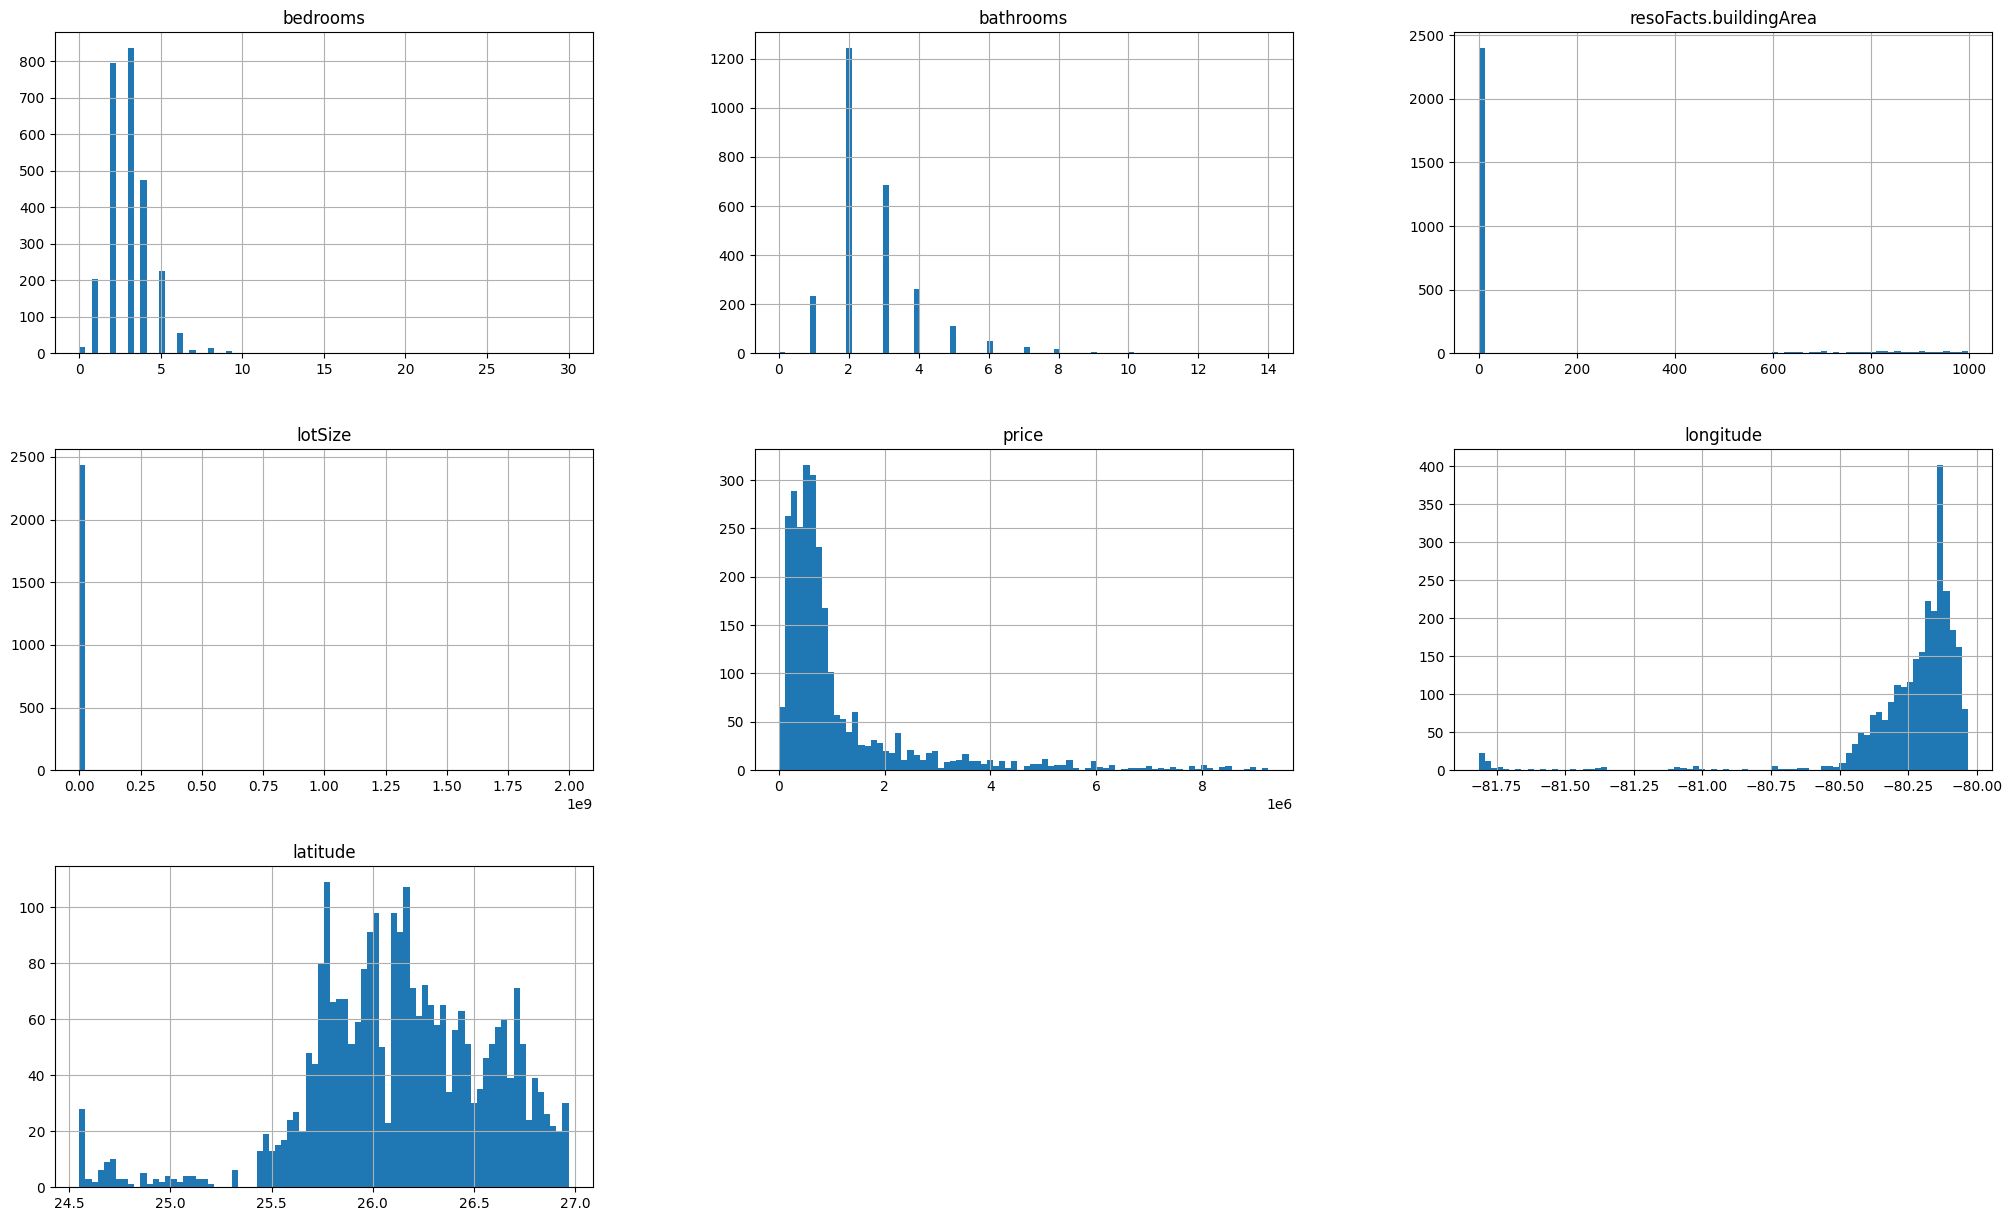

In [ ]:
# Creamos un histograma:

#

Price2[['bedrooms', 'bathrooms', 'resoFacts.buildingArea', 'lotSize', 'price', 'longitude',
       'latitude']].hist(bins = 80, figsize = (25, 15))

plt.show()

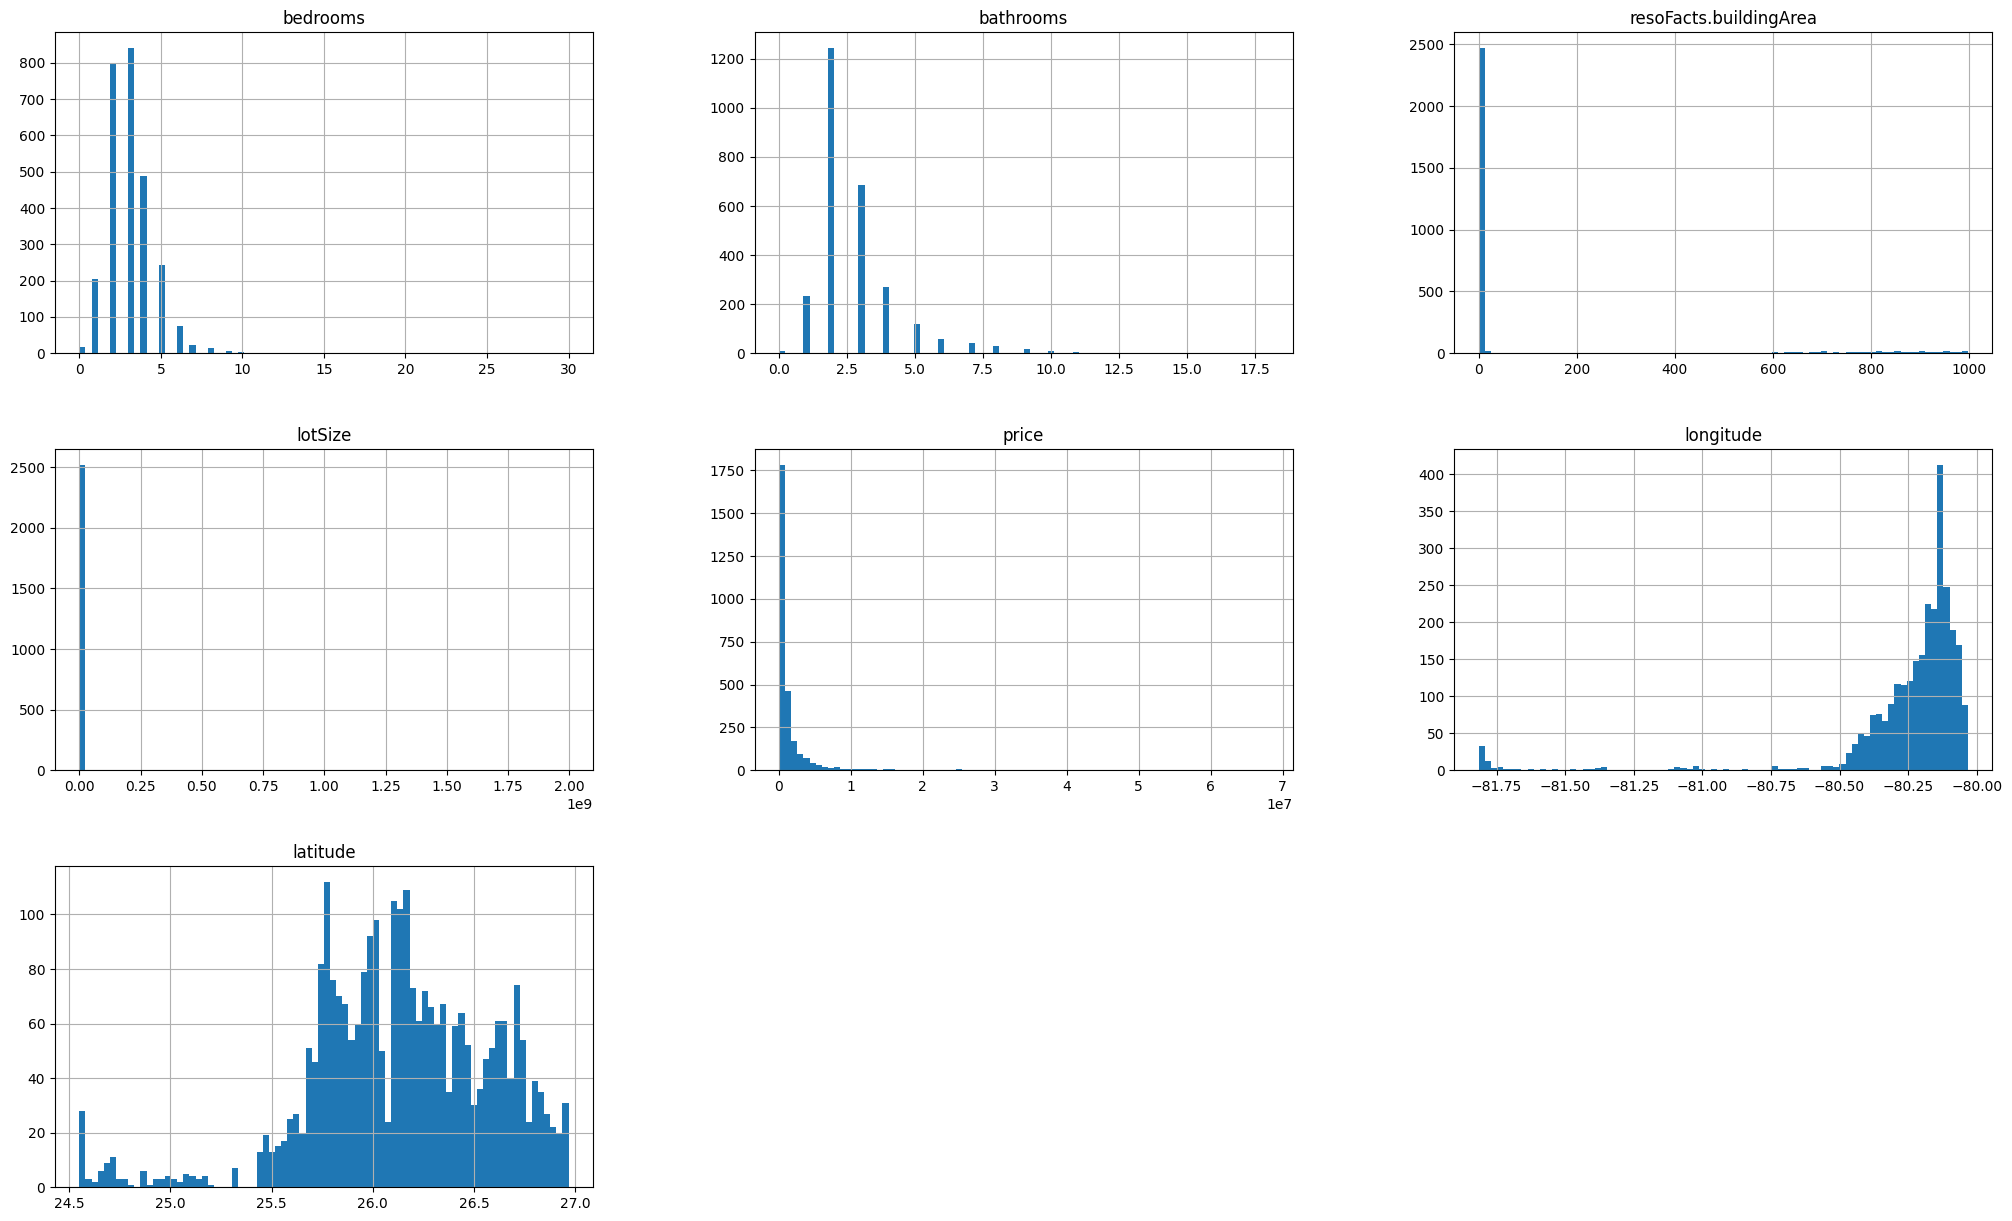

In [ ]:
#

Price2 = Price1[(Price1['price'] > 1000) & (Price1['price'] < 88900000)]

Price2[['bedrooms', 'bathrooms', 'resoFacts.buildingArea', 'lotSize', 'price', 'longitude',
       'latitude']].hist(bins = 80, figsize = (25, 15))

plt.show()

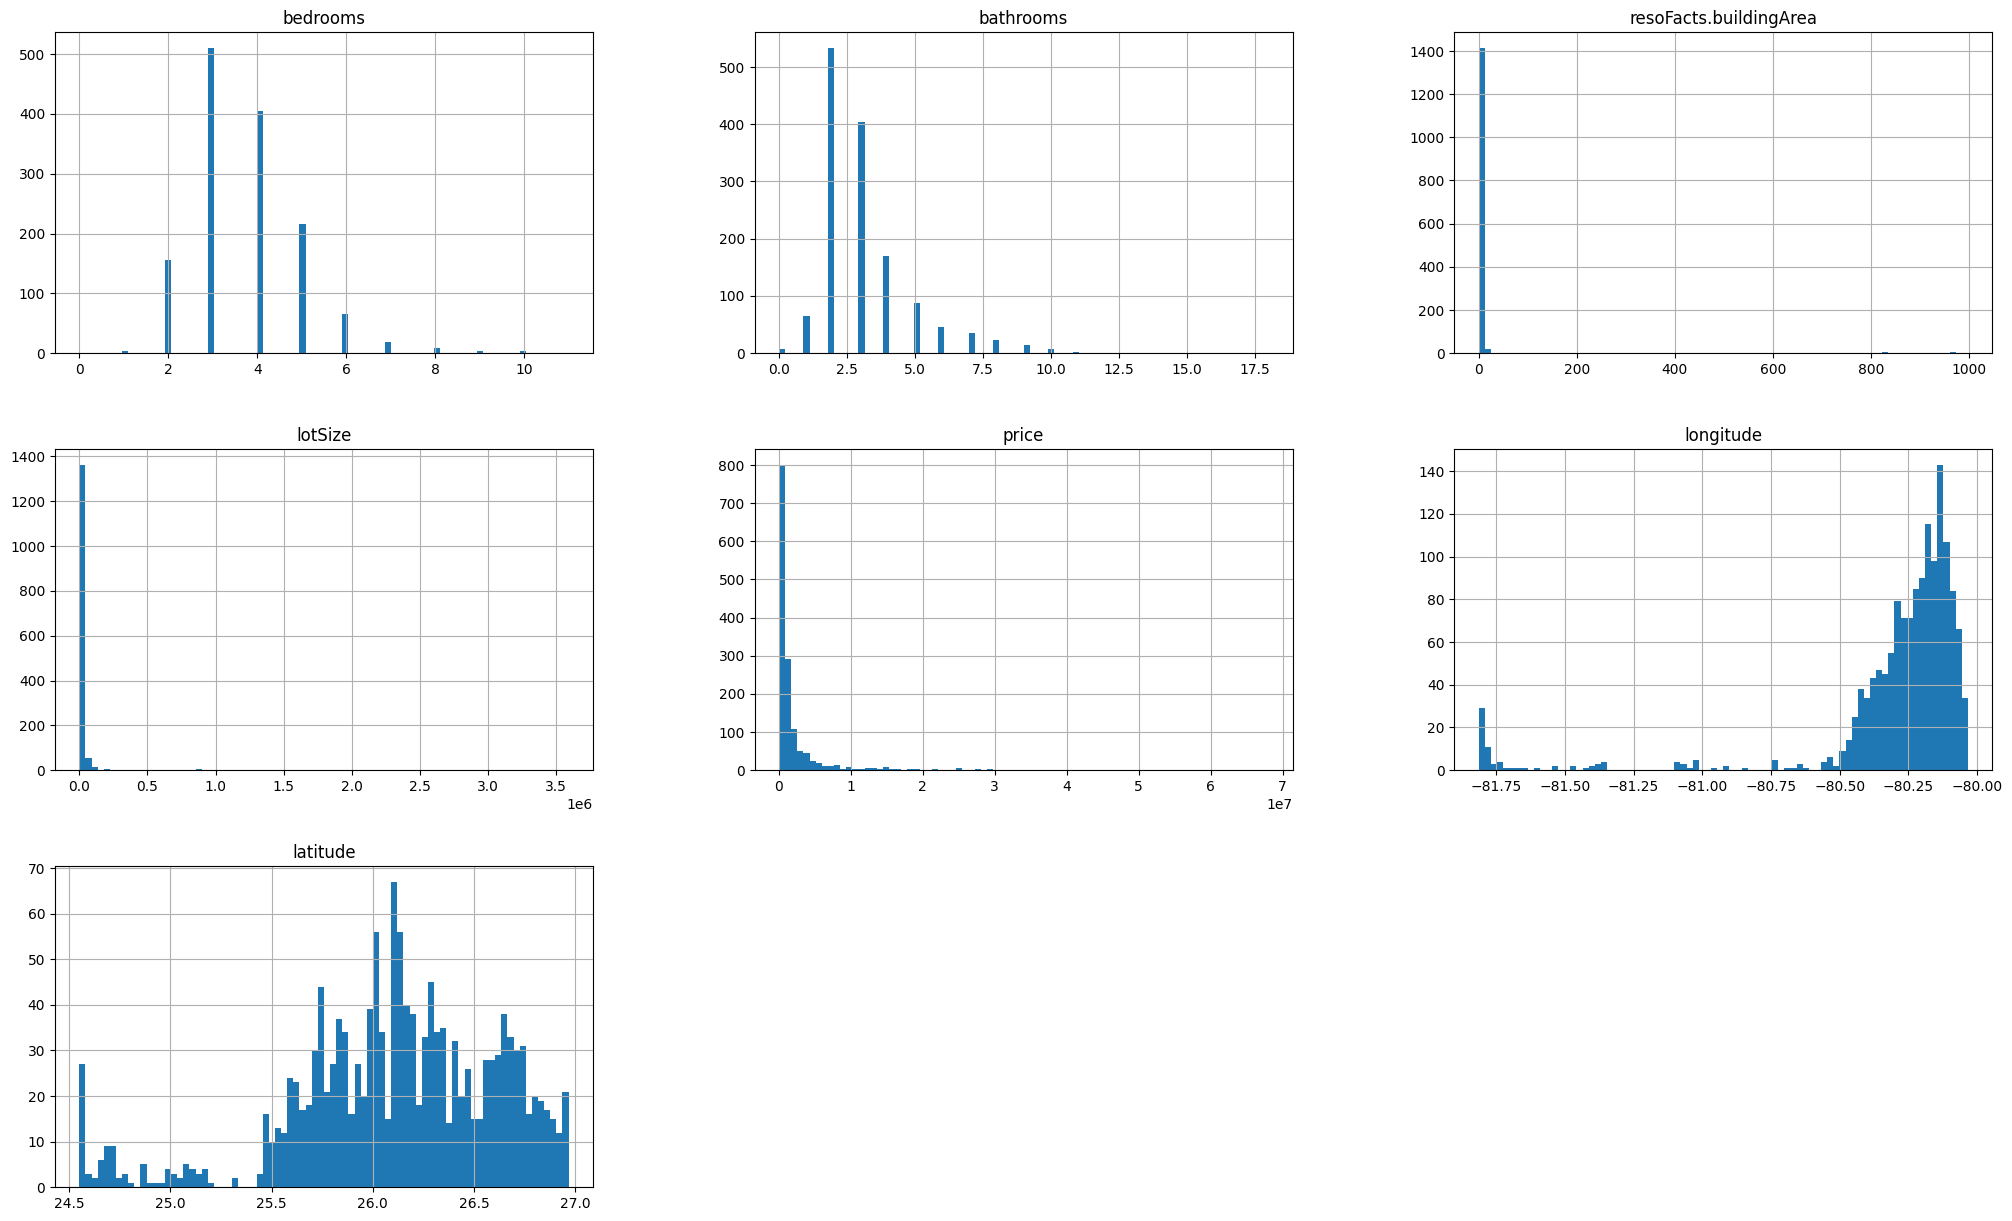

In [ ]:
#


Price2 = Price2[(Price2['lotSize'] > 100) & (Price2['lotSize'] < 9455000)]


Price2[['bedrooms', 'bathrooms', 'resoFacts.buildingArea', 'lotSize', 'price', 'longitude',
       'latitude']].hist(bins = 80, figsize = (25, 15))

plt.show()

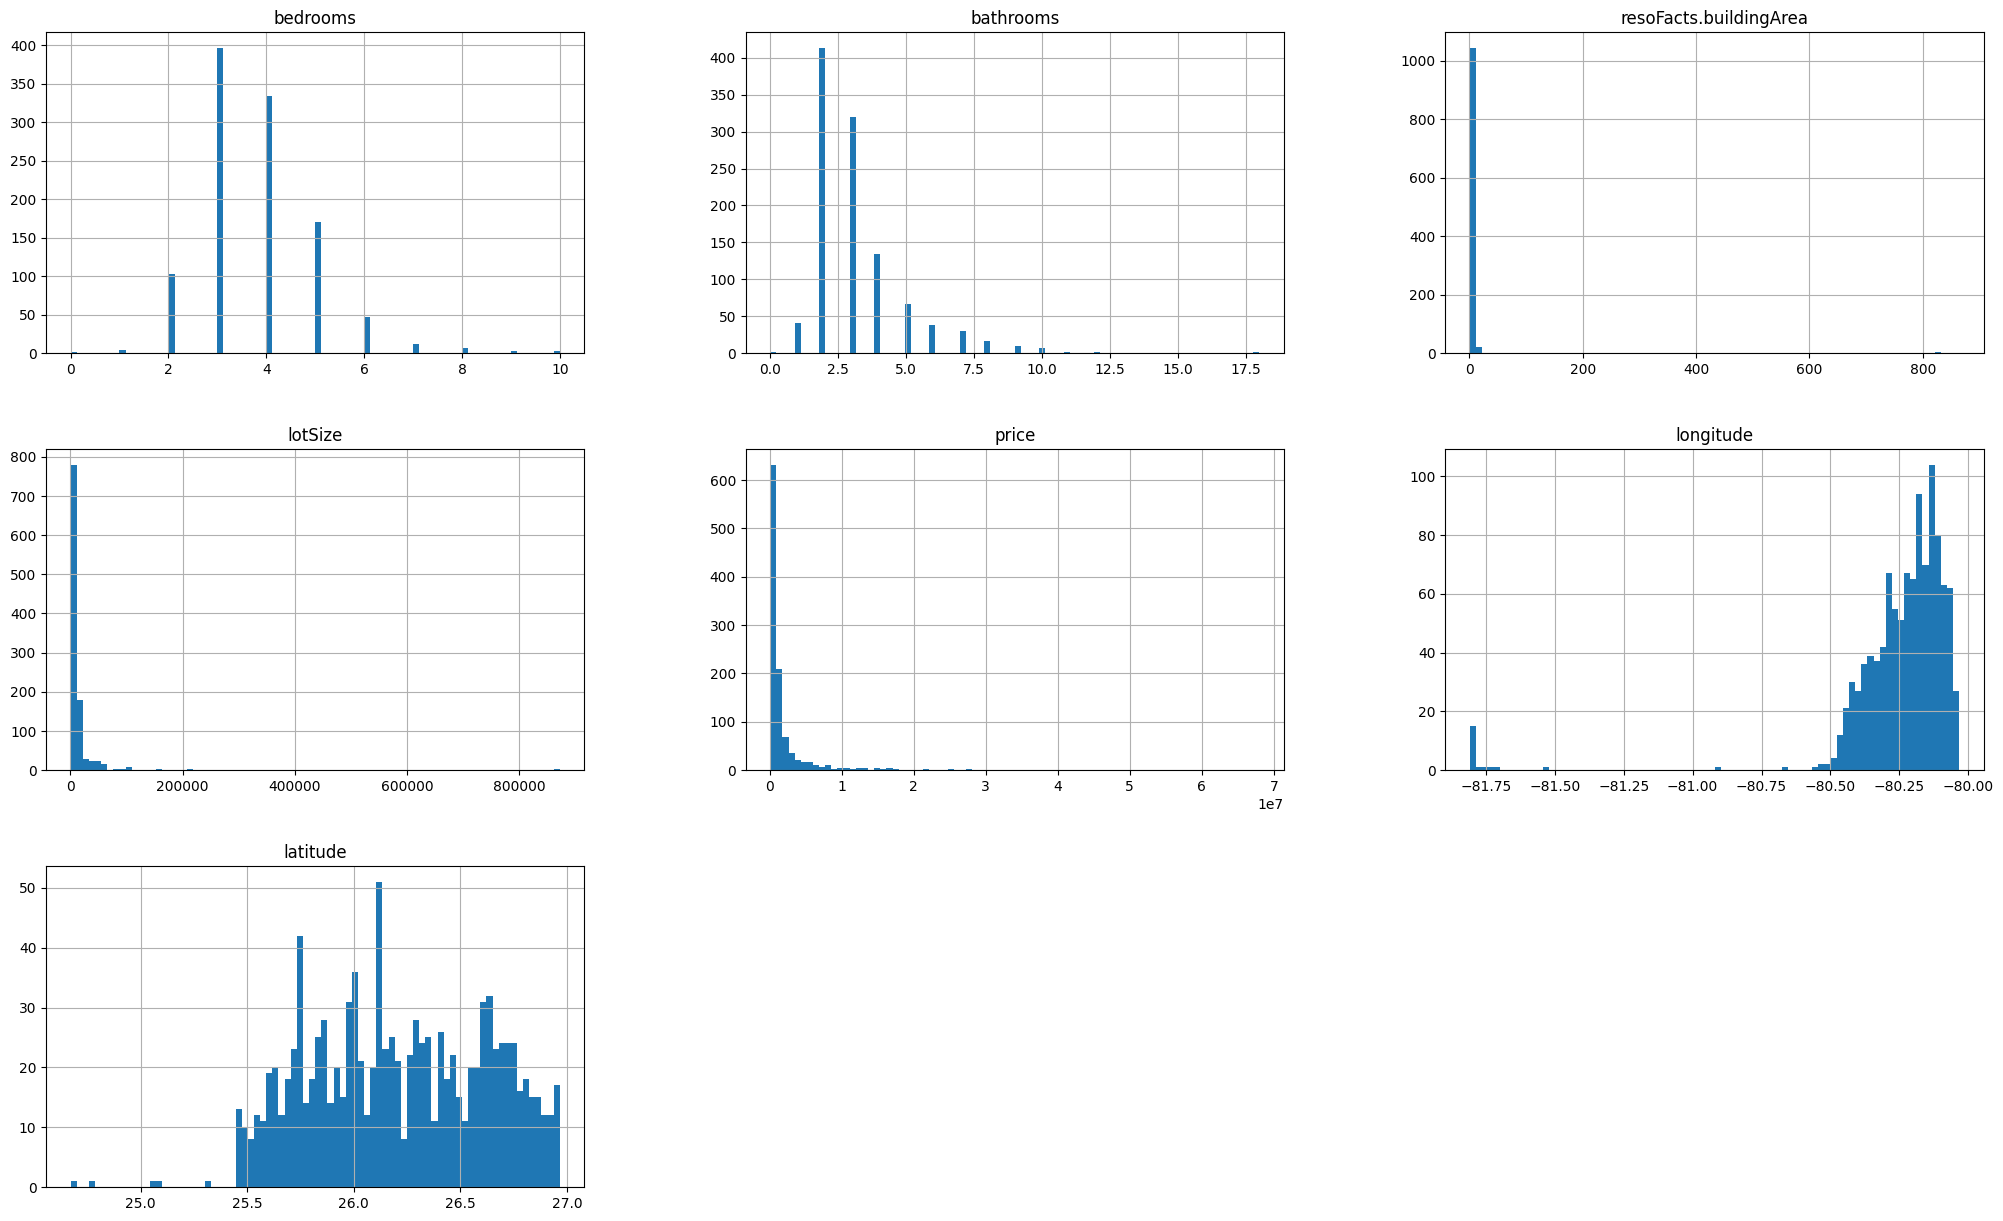

In [ ]:
#


Price2 = Price2[(Price2['resoFacts.buildingArea'] > 0) & (Price2['resoFacts.buildingArea'] < 900)]


Price2[['bedrooms', 'bathrooms', 'resoFacts.buildingArea', 'lotSize', 'price', 'longitude',
       'latitude']].hist(bins = 80, figsize = (25, 15))

plt.show()

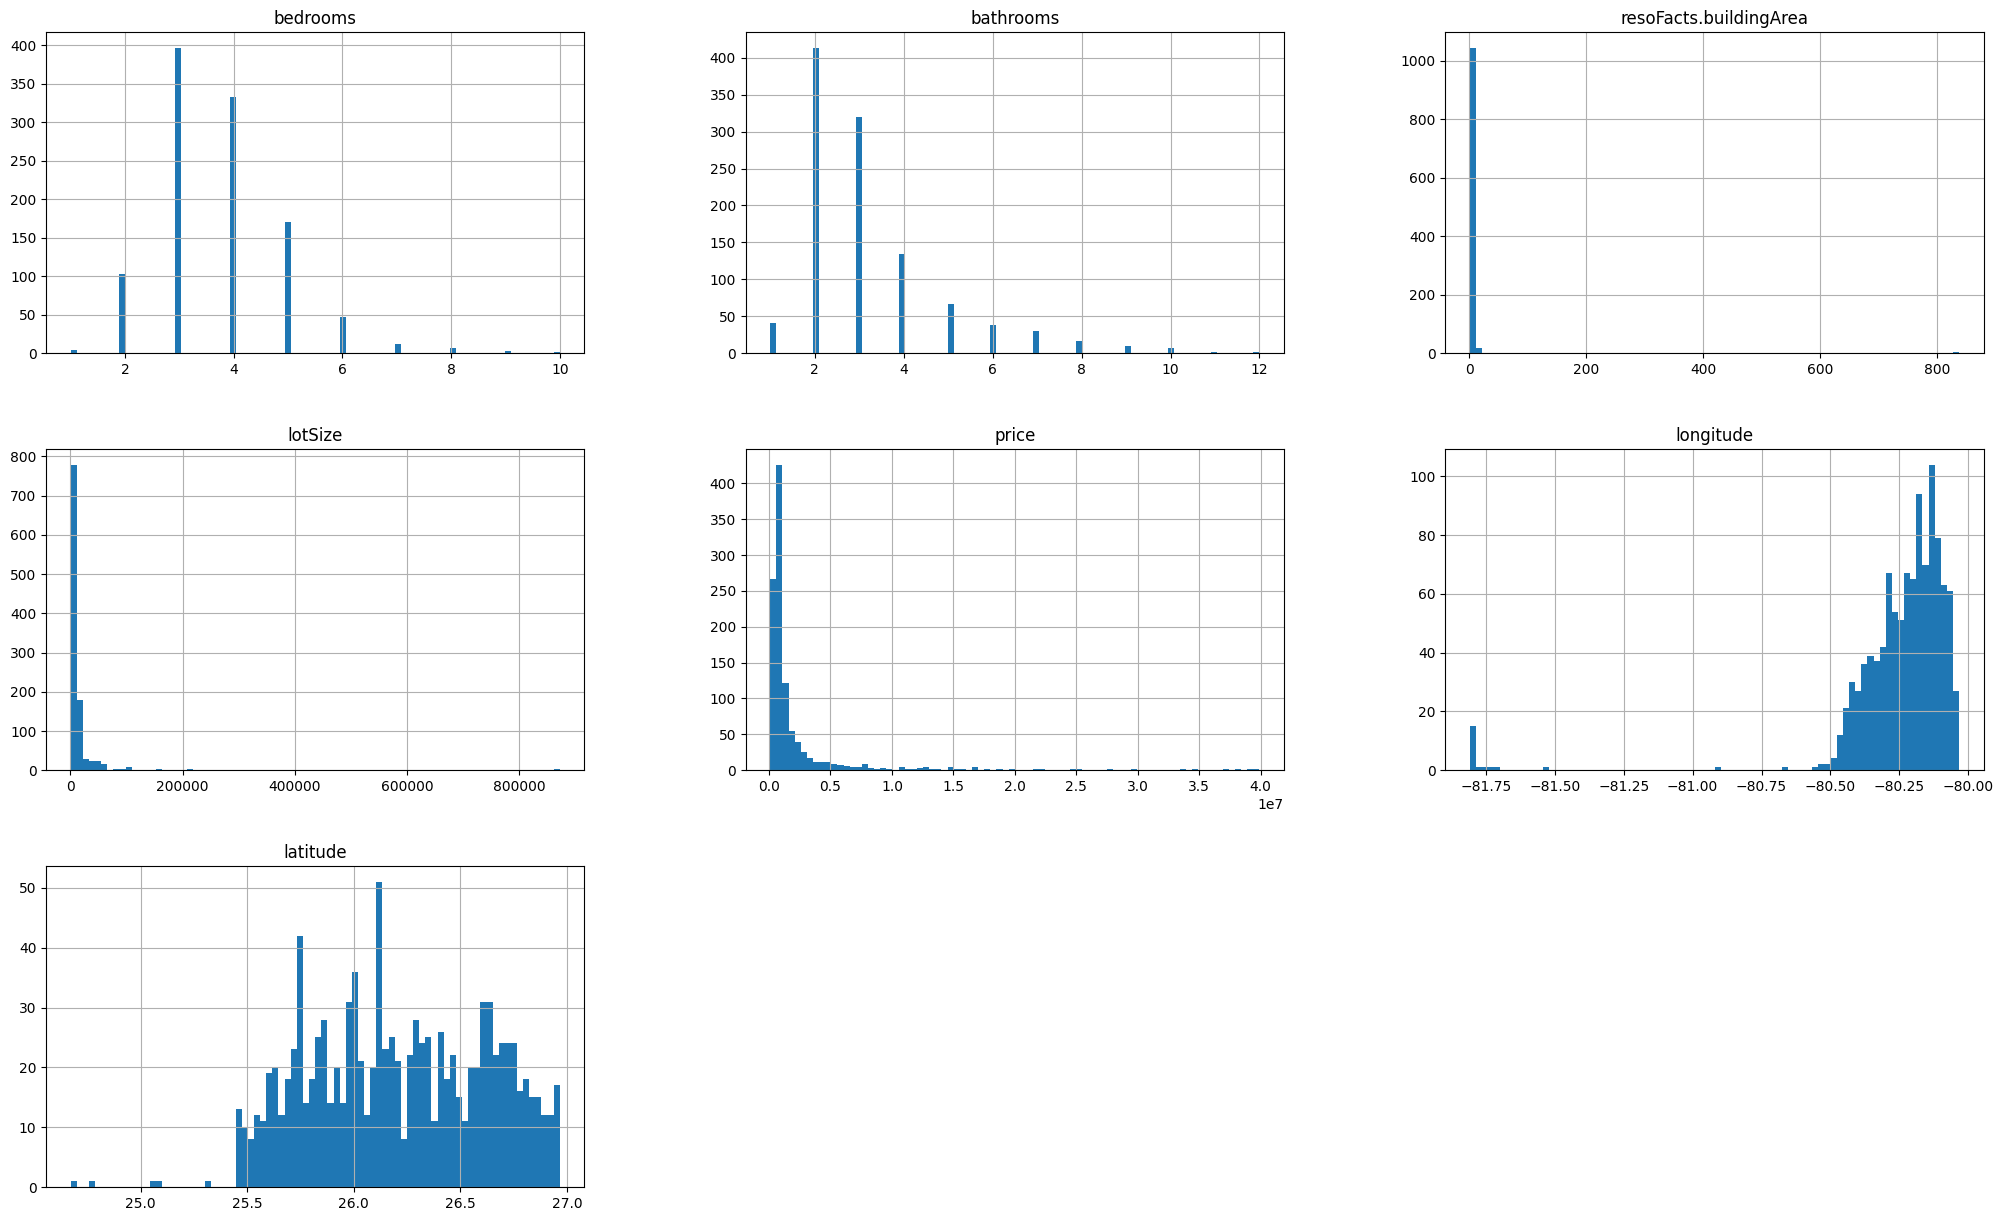

In [ ]:
#


Price2 = Price2[(Price2['bathrooms'] > 0) & (Price2['bathrooms'] < 18)]


Price2[['bedrooms', 'bathrooms', 'resoFacts.buildingArea', 'lotSize', 'price', 'longitude',
       'latitude']].hist(bins = 80, figsize = (25, 15))

plt.show()

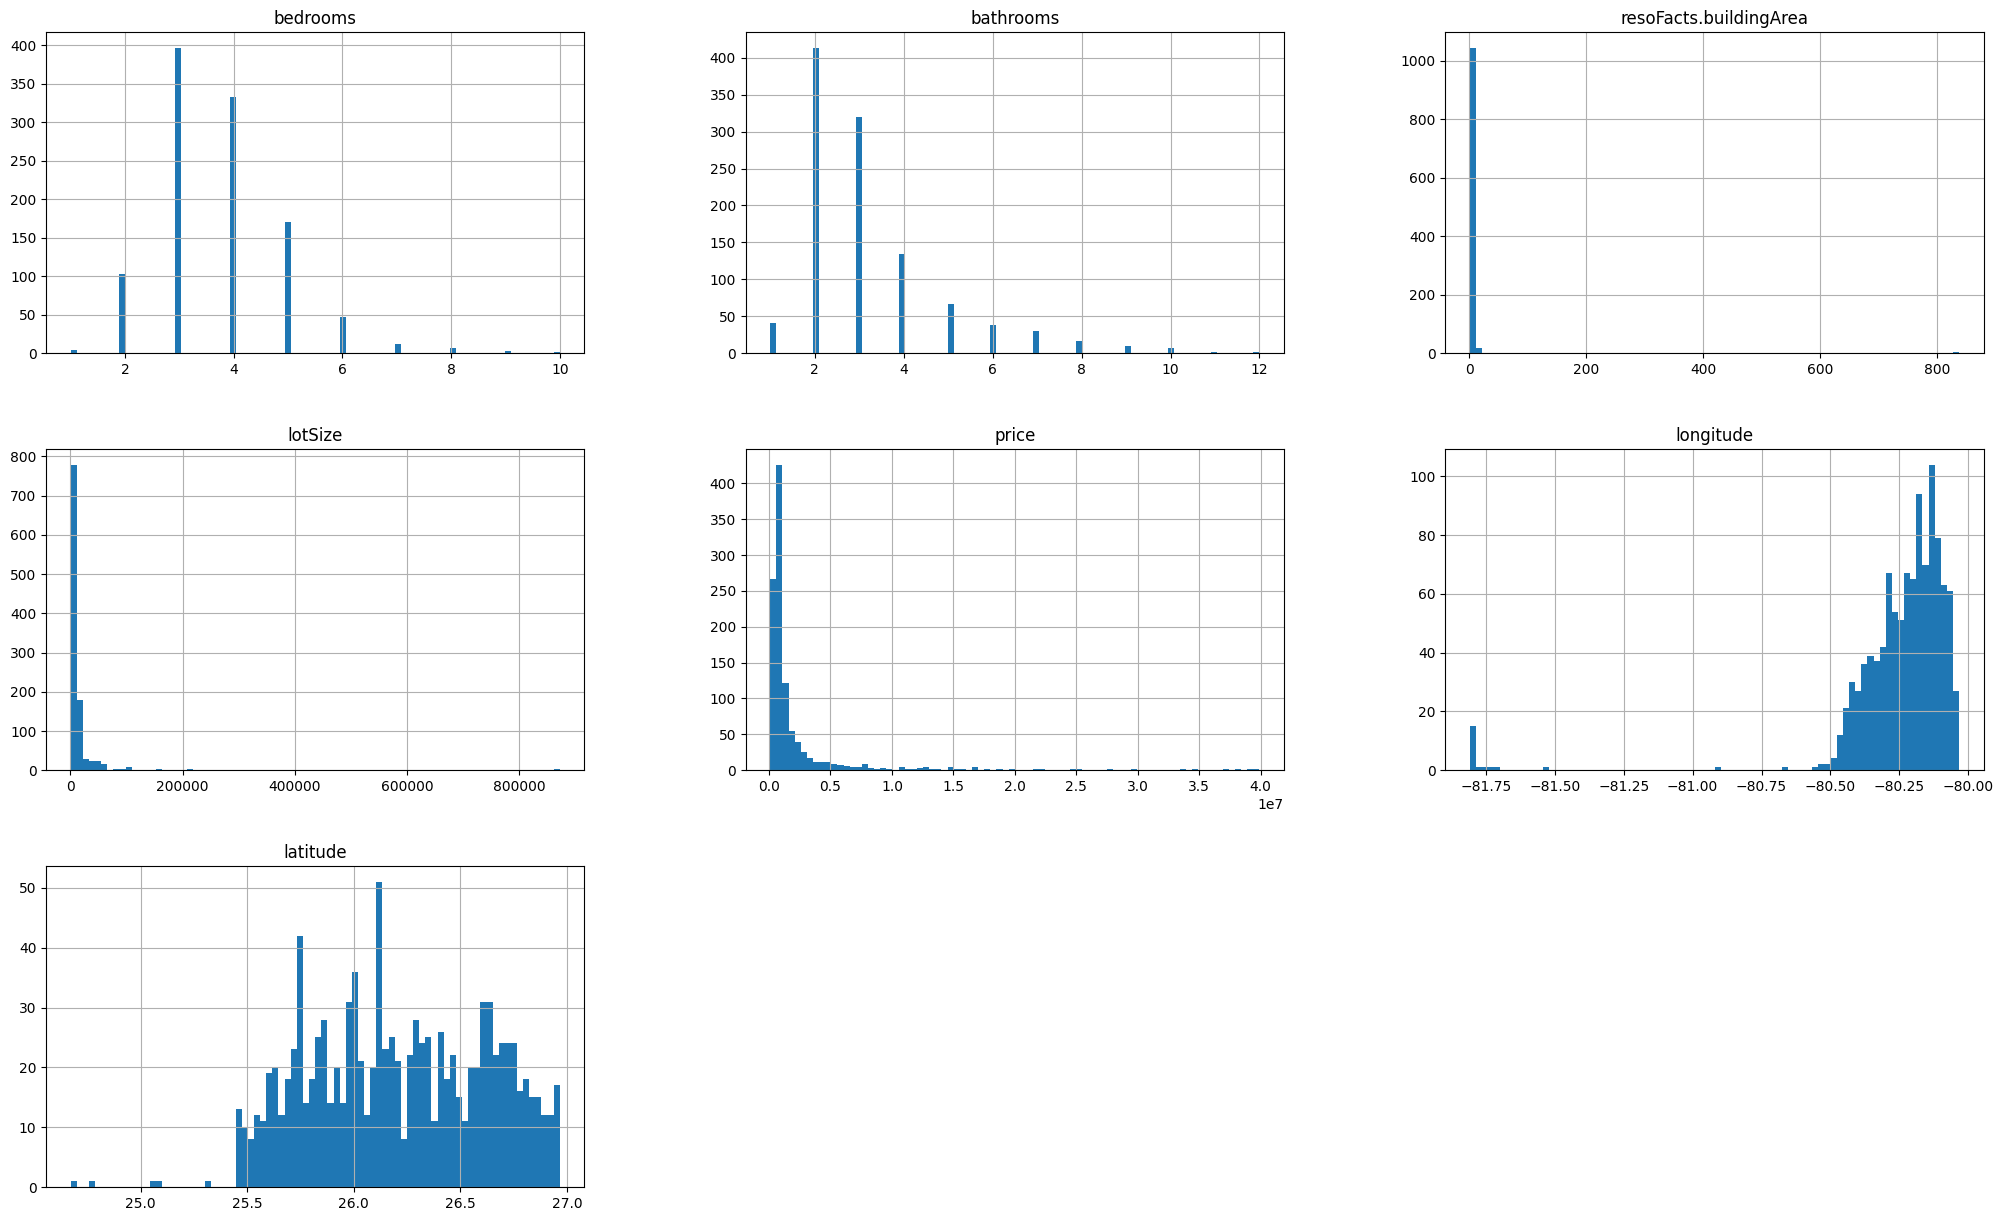

In [ ]:
#

Price2 = Price2[(Price2['bedrooms'] > 0) & (Price2['bedrooms'] < 30)]


Price2[['bedrooms', 'bathrooms', 'resoFacts.buildingArea', 'lotSize', 'price', 'longitude',
       'latitude']].hist(bins = 80, figsize = (25, 15))

plt.show()

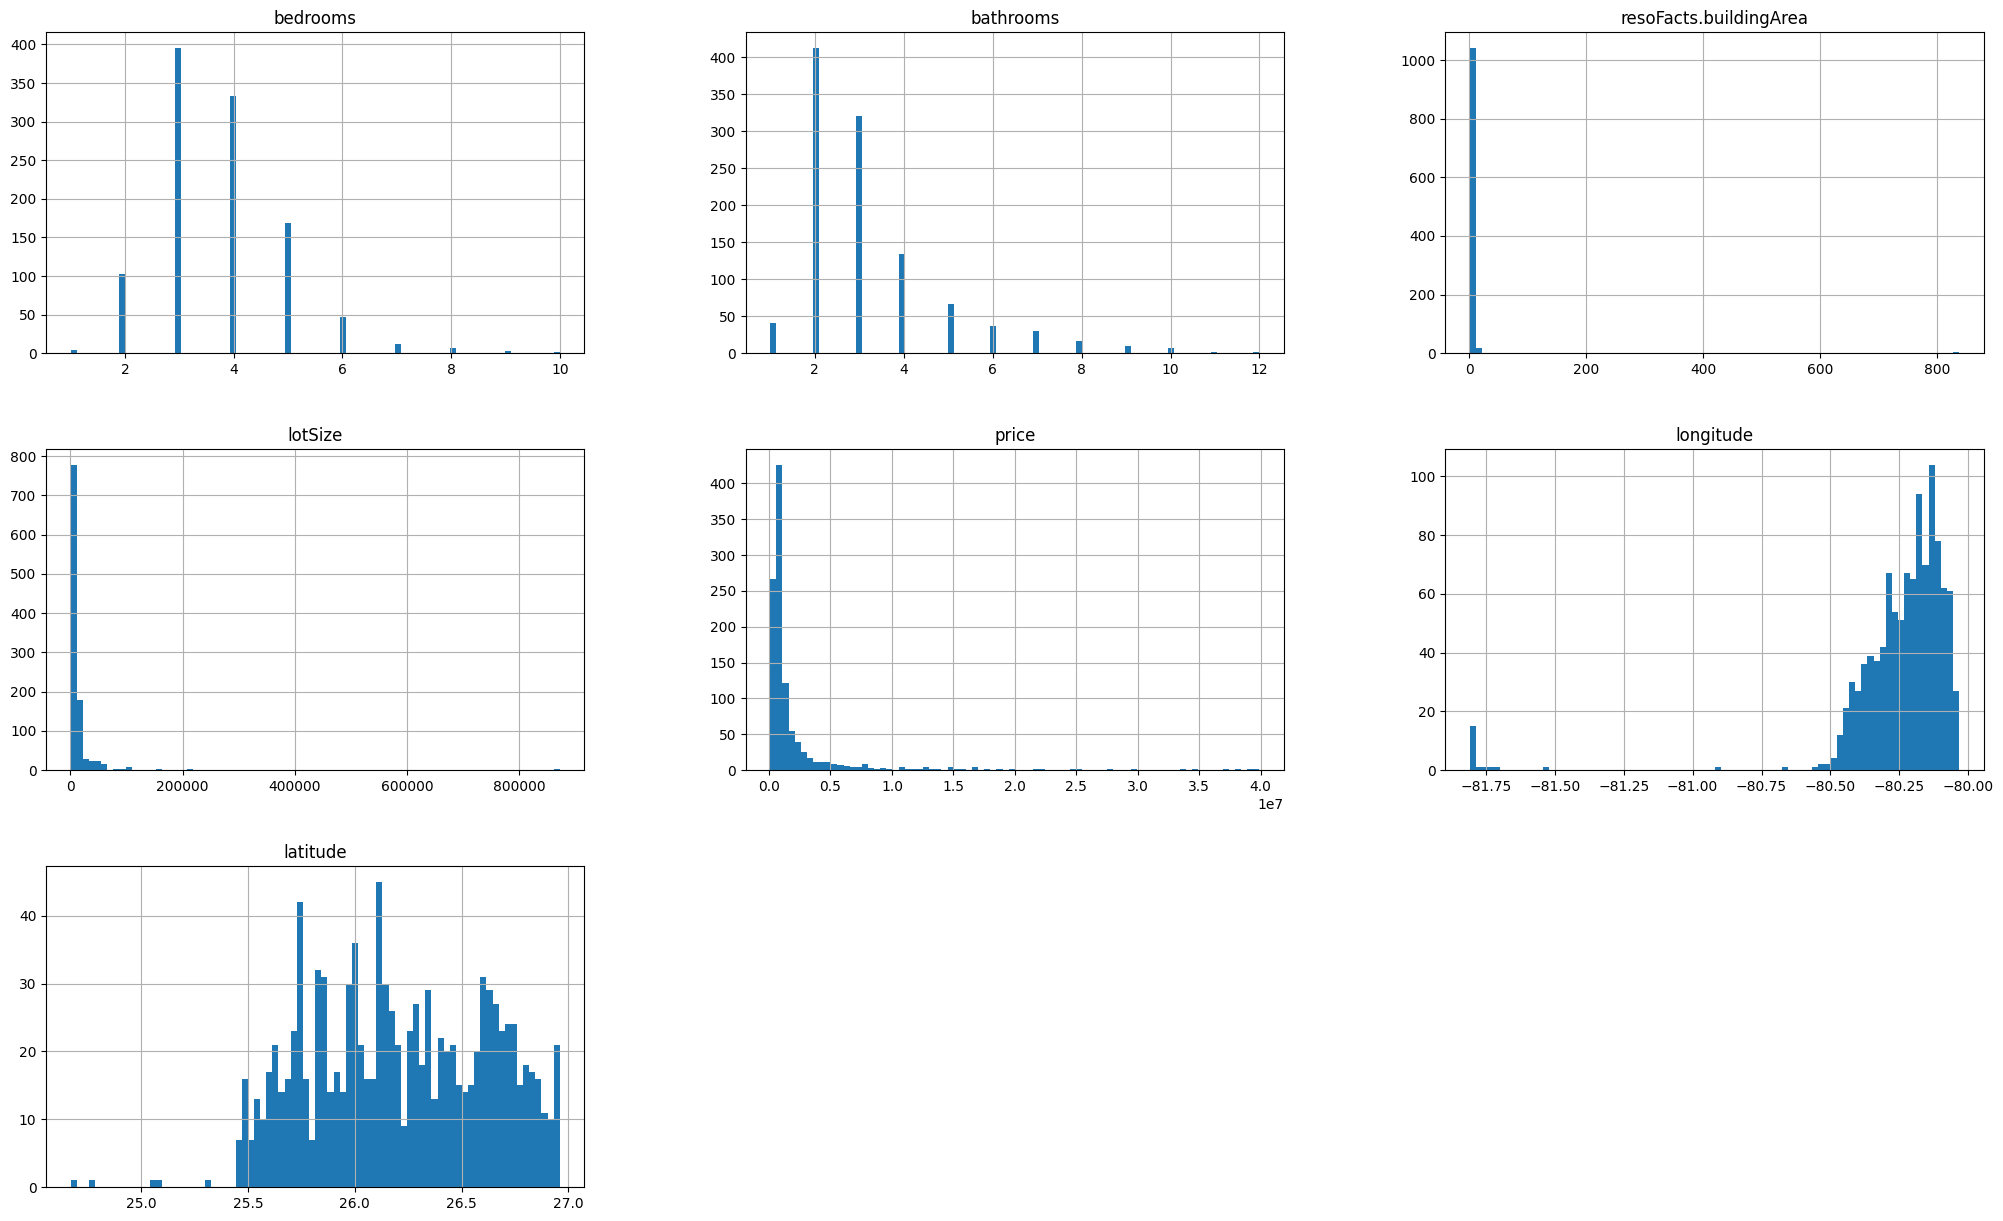

In [ ]:
#



Price2 = Price2[(Price2['latitude'] > 24.54) & (Price2['latitude'] < 26.96) & \
                (Price2['longitude'] > - 81.81) & (Price2['longitude'] < - 80.03)]


Price2[['bedrooms', 'bathrooms', 'resoFacts.buildingArea', 'lotSize', 'price', 'longitude',
       'latitude']].hist(bins = 80, figsize = (25, 15))

plt.show()

### En suma:

In [ ]:
#

Price2 = Price1[
    (Price1['price'] > 1000) & (Price1['price'] < 88900000) &
    (Price2['lotSize'] > 100) & (Price2['lotSize'] < 9455000) &
    (Price2['resoFacts.buildingArea'] > 0) & (Price2['resoFacts.buildingArea'] < 900) &
    (Price2['bathrooms'] > 0) & (Price2['bathrooms'] < 18) &
    (Price2['bedrooms'] > 0) & (Price2['bedrooms'] < 30) &
    (Price2['latitude'] > 24.54) & (Price2['latitude'] < 26.96) &
    (Price2['longitude'] > -81.81) & (Price2['longitude'] < -80.03)
]


In [ ]:
#

print("Total original:", Price1.shape[0])

f1 = Price1[(Price1['price'] > 1000) & (Price1['price'] < 88900000)]
print("Después de filtro de precio:", f1.shape[0])

f2 = f1[(f1['lotSize'] > 100) & (f1['lotSize'] < 9455000)]
print("Después de filtro de lotSize:", f2.shape[0])

f3 = f2[(f2['resoFacts.buildingArea'] > 0) & (f2['resoFacts.buildingArea'] < 900)]
print("Después de filtro de buildingArea:", f3.shape[0])

f4 = f3[(f3['bathrooms'] > 0) & (f3['bathrooms'] < 18)]
print("Después de filtro de bathrooms:", f4.shape[0])

f5 = f4[(f4['bedrooms'] > 0) & (f4['bedrooms'] < 30)]
print("Después de filtro de bedrooms:", f5.shape[0])

f6 = f5[(f5['latitude'] > 24.54) & (f5['latitude'] < 26.96) &
        (f5['longitude'] > -81.81) & (f5['longitude'] < -80.03)]
print("Después de filtro geográfico:", f6.shape[0])


Price1.shape, Price2.shape

Total original: 2806
Después de filtro de precio: 2799
Después de filtro de lotSize: 1459
Después de filtro de buildingArea: 1080
Después de filtro de bathrooms: 1077
Después de filtro de bedrooms: 1077
Después de filtro geográfico: 1075


((2806, 805), (1075, 805))

In [ ]:
#

Price2['resoFacts.pricePerSquareFoot'] = Price2['price'] / Price2['resoFacts.buildingArea']

## Visualización

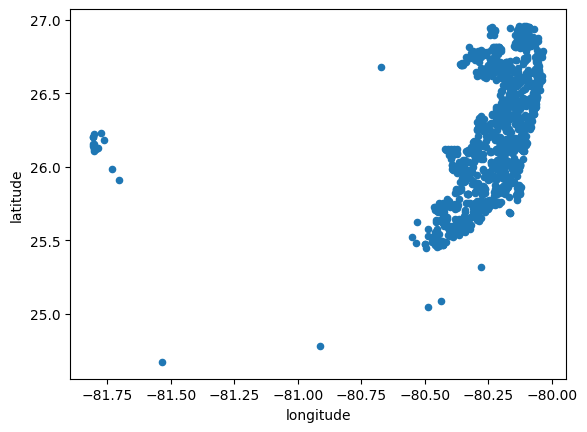

In [ ]:
#

Price2.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

plt.show()

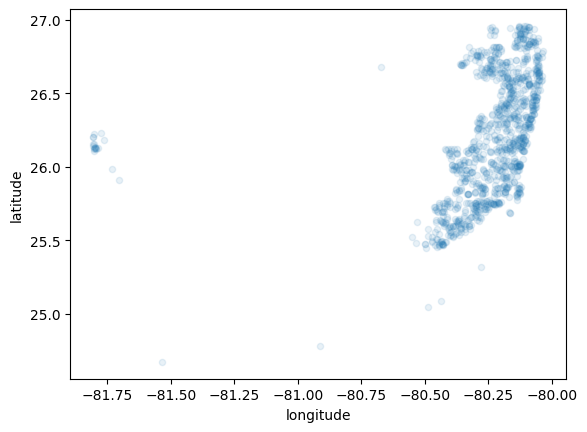

In [ ]:
#

Price2.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

plt.show()

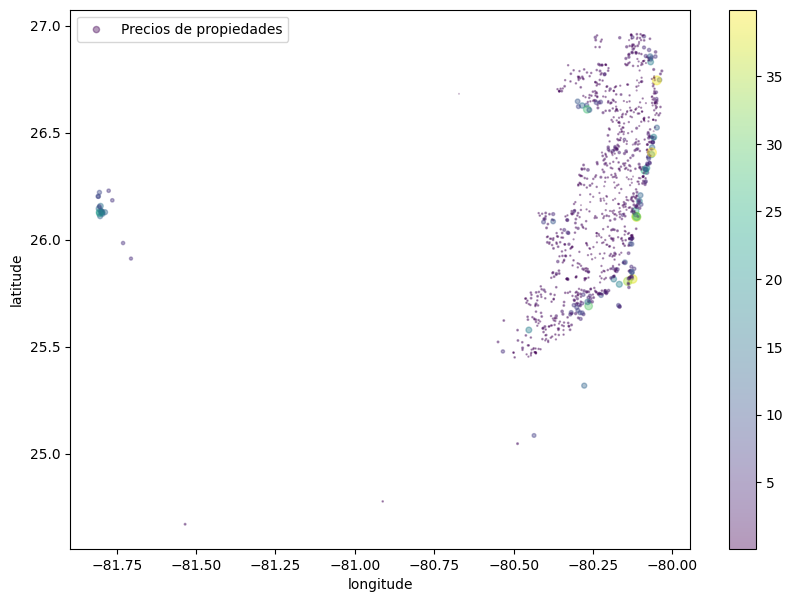

In [ ]:
#

Price2.plot( kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
                s = Price2['price']/1000000, label = "Precios de propiedades",
                figsize = (10, 7),
                c = Price2['price']/1000000,  colorbar = True)

plt.legend()

plt.show()

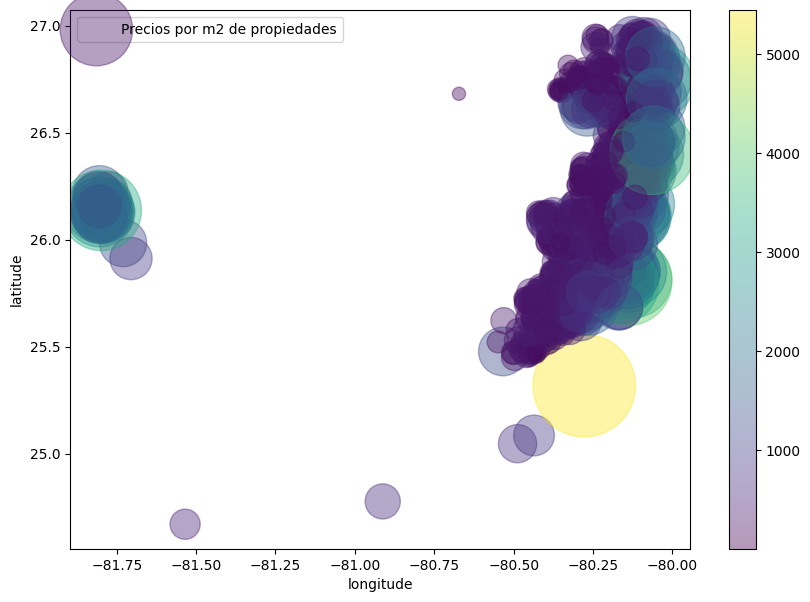

In [ ]:
#

Price2.plot( kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
                s = Price2['resoFacts.pricePerSquareFoot']/1000, label = "Precios por m2 de propiedades",
                figsize = (10, 7),
                c = Price2['resoFacts.pricePerSquareFoot']/1000,  colorbar = True)

plt.legend()

plt.show()

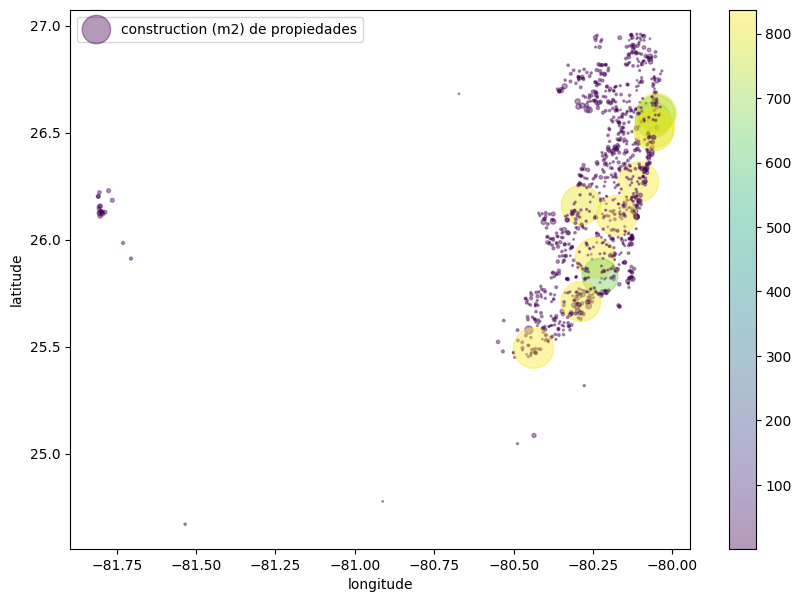

In [ ]:
#

Price2.plot( kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
                s = Price2['resoFacts.buildingArea'], label = "construction (m2) de propiedades",
                figsize = (10, 7),
                c = Price2['resoFacts.buildingArea'],  colorbar = True)

plt.legend()

plt.show()

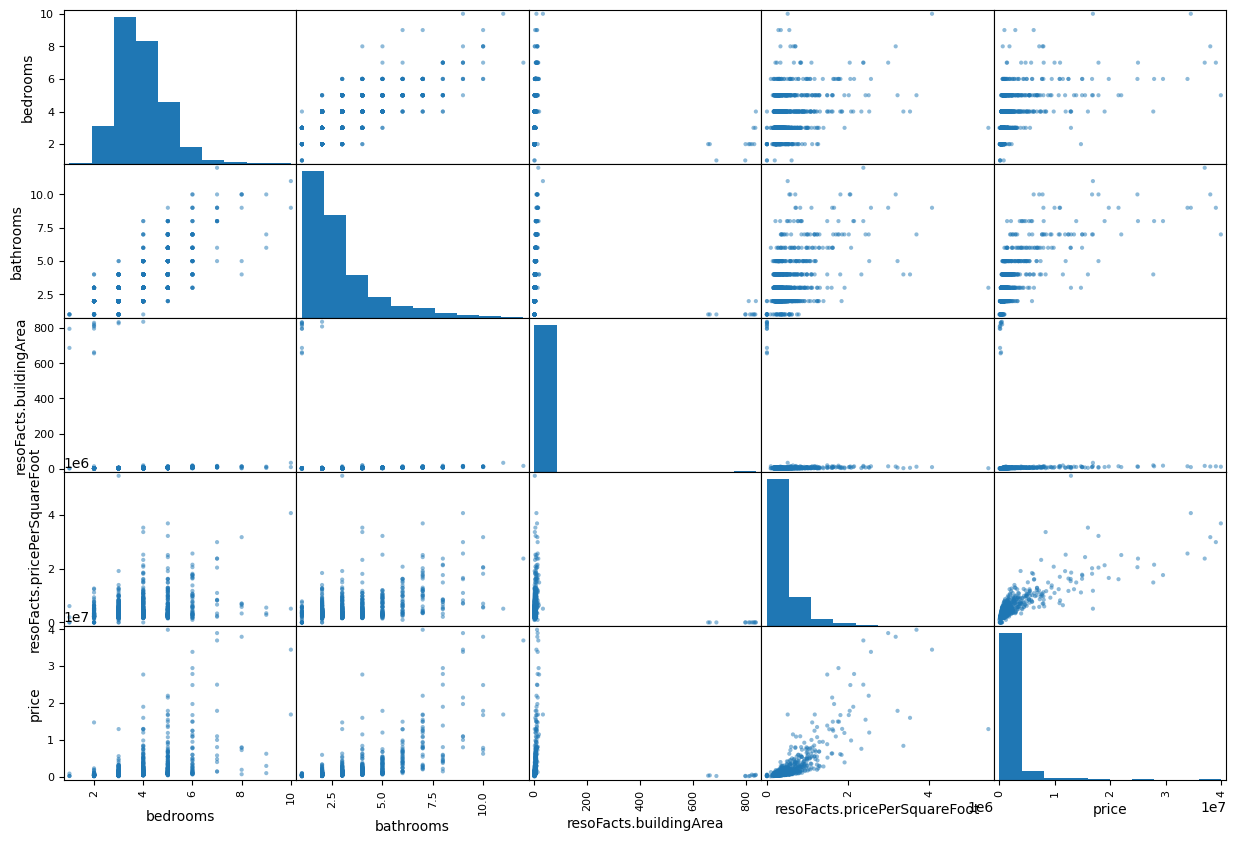

In [ ]:
#
attributes = ['bedrooms', 'bathrooms', 'resoFacts.buildingArea', 'resoFacts.pricePerSquareFoot', 'price']

scatter_matrix(Price2[attributes], figsize = (15, 10))

plt.show()

In [ ]:
# Save

Price2.to_excel('Price2.xlsx', index=False)

## El Modelo

In [ ]:
#

Price2['construction'] = Price2['construction (m2)']
Price2['lotSize'] = Price2['terrain (m2)']

# Formulamos la regresión

formula = 'Monto1 ~ rooms + bathrooms + construction + terrain + lat + lng'

results = ols(formula, Venta_sel).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Monto1   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     8019.
Date:                Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:14:34   Log-Likelihood:            -6.5228e+05
No. Observations:               37948   AIC:                         1.305e+06
Df Residuals:                   37941   BIC:                         1.305e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.908e+08   5.38e+07     -7.260   

In [ ]:
# Definamos la matriz X y el vector Y

X = Venta_sel[["rooms", "bathrooms", "construction (m2)", "terrain (m2)", 'lat', 'lng']]

y = Venta_sel["Monto1"].values.reshape(-1, 1)

X.shape, y.shape

((37948, 6), (37948, 1))

In [ ]:
# Separamos los datos en prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [ ]:
#

X_train.shape, X_test.shape, 28461/(28461+9487)

((28461, 6), (9487, 6), 0.75)

In [ ]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
# Create a LinearRegression model and fit it to the scaled training data

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [ ]:
# Extract coefficients form regression
# Venta_sel[["rooms", "bathrooms", "construction (m2)", "terrain (m2)", 'lat', 'lng']]

model.intercept_, model.coef_

(array([-6.33956895e-16]),
 array([[-0.21598639,  0.10729747,  0.52690458,  0.24436731, -0.06588256,
         -0.03924492]]))

In [ ]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Obs: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
predictions

array([[-0.49159842],
       [ 0.99201205],
       [ 0.4614573 ],
       ...,
       [-0.53567438],
       [-0.57338522],
       [ 1.05788286]])

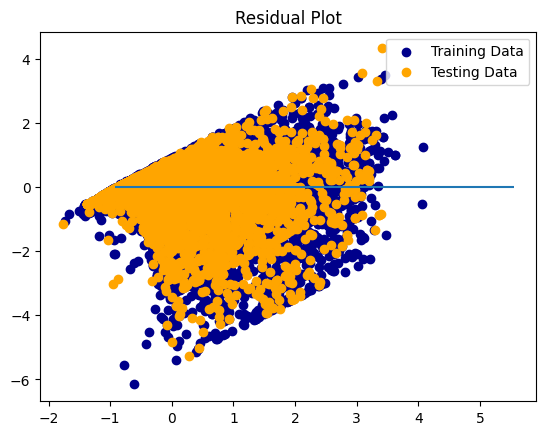

In [ ]:
# PLOT

plt.scatter( model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled,
             c = "darkblue", label = "Training Data" )

plt.scatter( model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled,
             c = "orange", label = "Testing Data" )

plt.legend()

plt.hlines( y = 0, xmin = y_test_scaled.min(), xmax = y_test_scaled.max() )

plt.title("Residual Plot")

plt.show()

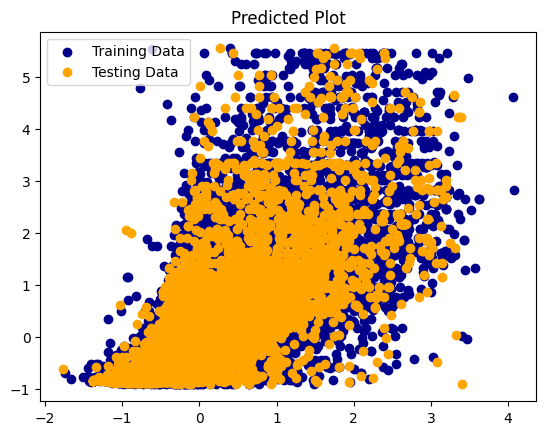

In [ ]:
# PLOT

plt.scatter( model.predict(X_train_scaled), y_train_scaled,
             c = "darkblue", label = "Training Data" )

plt.scatter( model.predict(X_test_scaled), y_test_scaled,
             c = "orange", label = "Testing Data" )

plt.legend()

plt.title("Predicted Plot")

plt.show()

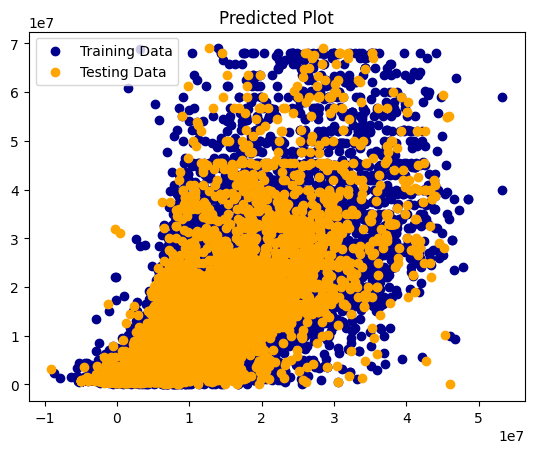

In [ ]:
# PLOT Re-Scaled Data

plt.scatter( y_scaler.inverse_transform(model.predict(X_train_scaled)),
             y_scaler.inverse_transform(y_train_scaled),
             c = "darkblue", label = "Training Data" )

plt.scatter( y_scaler.inverse_transform(model.predict(X_test_scaled)),
             y_scaler.inverse_transform(y_test_scaled),
             c = "orange", label = "Testing Data" )

plt.legend()

plt.title("Predicted Plot")

plt.show()

In [ ]:
# Compare R2:

model.score(X_train_scaled, y_train_scaled), model.score(X_test_scaled, y_test_scaled)

(0.5608655950108796, 0.5533925832124309)

In [ ]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
# When alpha = 0, the objective is equivalent to ordinary least squares,
# solved by the LinearRegression object.
# For numerical reasons, using alpha = 0 with the Lasso object is not advised.
# Instead, you should use the LinearRegression object.

lasso = Lasso( alpha = 0.1 )
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.1)

In [ ]:
# Extract coefficients form lasso regression Vs linear regression
# Venta_sel[["rooms", "bathrooms", "construction (m2)", "terrain (m2)", 'lat', 'lng']]

lasso.intercept_, lasso.coef_, model.intercept_, model.coef_

(array([-2.26011357e-16]),
 array([-0.        ,  0.        ,  0.4261333 ,  0.21518287, -0.        ,
        -0.00618257]),
 np.float64(-6.339568946864117e-16),
 array([-0.21598639,  0.10729747,  0.52690458,  0.24436731, -0.06588256,
        -0.03924492]))

In [ ]:
#

predictions = lasso.predict(X_test_scaled)

predictions

array([-0.52628849,  0.9607111 ,  0.53174576, ..., -0.41216417,
       -0.34587811,  0.81612142])

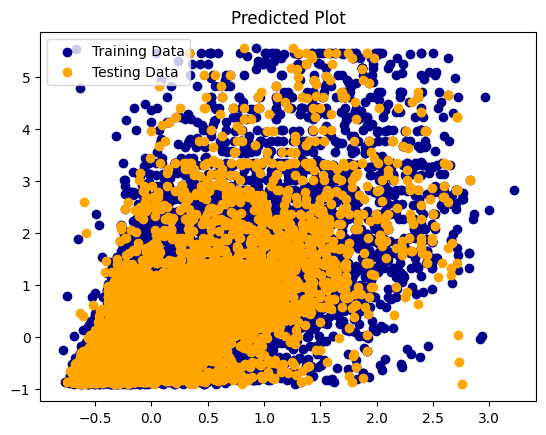

In [ ]:
# PLOT

plt.scatter( lasso.predict(X_train_scaled), y_train_scaled,
             c = "darkblue", label = "Training Data" )

plt.scatter( lasso.predict(X_test_scaled), y_test_scaled,
             c = "orange", label = "Testing Data" )

plt.legend()

plt.title("Predicted Plot")

plt.show()

In [ ]:
# Compare R2:

lasso.score(X_train_scaled, y_train_scaled), lasso.score(X_test_scaled, y_test_scaled)

(0.5602206592954861, 0.5528829551298318)

In [ ]:
#

model.score(X_train_scaled, y_train_scaled), model.score(X_test_scaled, y_test_scaled)

(0.5608655950108796, 0.5533925832124309)

In [ ]:
# use automatically configured the lasso regression algorithm

# define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

# fit model
model.fit(X_train_scaled, y_train_scaled)

# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.000000
